In [2]:
# General libraries
import matplotlib.pyplot as plt
import numpy as np

# Qibo libraries
import qibo
from qibo import gates, models
from qibo.models import Circuit
from qibo.ui import plot

%matplotlib inline

In [3]:
nqubits = 4
nlayers = 3

# Create variational ansatz circuit Twolocal
ansatz = models.Circuit(nqubits)
for l in range(nlayers):
    
    ansatz.add((gates.RY(q, theta=0) for q in range(nqubits)))
    
    for i in range(nqubits - 3):
        ansatz.add(gates.CNOT(i, i+1))
        ansatz.add(gates.CNOT(i, i+2))
        ansatz.add(gates.CNOT(i+1, i+2))
        ansatz.add(gates.CNOT(i, i+3))
        ansatz.add(gates.CNOT(i+1, i+3))
        ansatz.add(gates.CNOT(i+2, i+3))
    
ansatz.add((gates.RY(q, theta=0) for q in range(nqubits)))
ansatz.add(gates.M(qubit) for qubit in range(2))
print(ansatz.draw())

q0: ─RY─o─o───o─────RY─o─o───o─────RY─o─o───o─────RY─M─
q1: ─RY─X─|─o─|─o───RY─X─|─o─|─o───RY─X─|─o─|─o───RY─M─
q2: ─RY───X─X─|─|─o─RY───X─X─|─|─o─RY───X─X─|─|─o─RY───
q3: ─RY───────X─X─X─RY───────X─X─X─RY───────X─X─X─RY───


(<Axes: >, <Figure size 2160x240 with 1 Axes>)

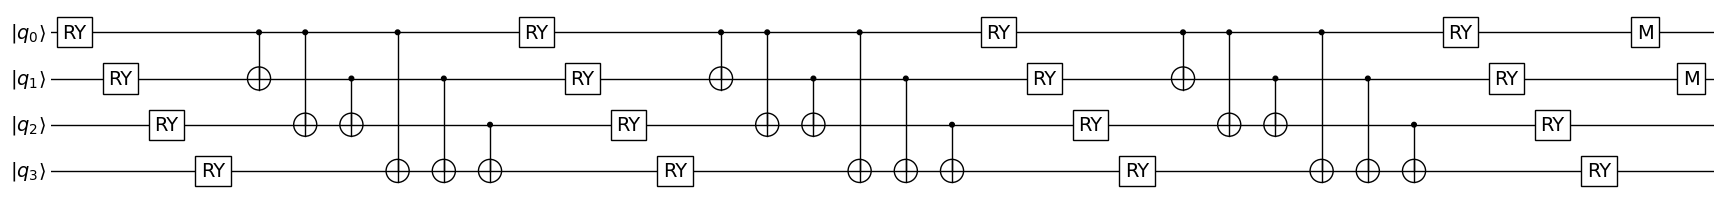

In [4]:
plot(ansatz, scale = 0.6, cluster_gates = False)

(<Axes: >, <Figure size 1680x280 with 1 Axes>)

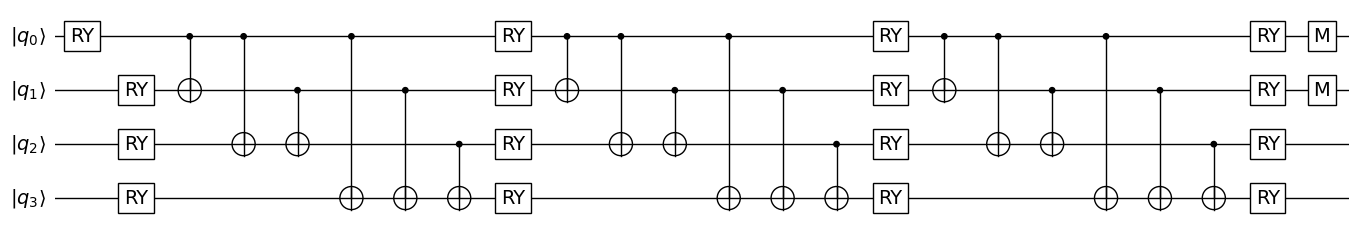

In [5]:
plot(ansatz, scale = 0.7, cluster_gates = True)

In [6]:
c = models.Circuit(3)
c.add(gates.H(1))
c.add(gates.X(1))
c.add(gates.SX(2))
c.add(gates.CSX(0,2))
c.add(gates.TOFFOLI(0,1, 2))
c.add(gates.CNOT(1, 2))
c.add(gates.SWAP(1,2))
c.add(gates.SiSWAP(1,2))
c.add(gates.FSWAP(1,2))
c.add(gates.DEUTSCH(1, 0, 2, np.pi))
c.add(gates.X(1))
c.add(gates.X(0))
c.add(gates.M(qubit) for qubit in range(2))
print(c.draw())

q0: ──────o───o───────────o──X─M─
q1: ─H──X─|───o─o─x─si─fx─o──X─M─
q2: ─SX───CSX─X─X─x─si─fx─DE─────


(<Axes: >, <Figure size 660x180 with 1 Axes>)

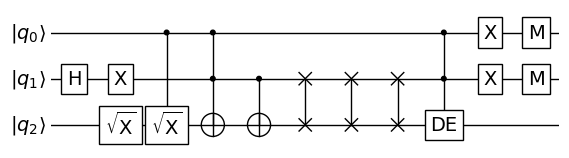

In [7]:
plot(c)

In [22]:
from qibo.models import QFT
c = QFT(5)
c.add(gates.M(qubit) for qubit in range(2))
print(c.draw())

q0: ─H─U1─U1─U1─U1───────────────────────────x───M─
q1: ───o──|──|──|──H─U1─U1─U1────────────────|─x─M─
q2: ──────o──|──|────o──|──|──H─U1─U1────────|─|───
q3: ─────────o──|───────o──|────o──|──H─U1───|─x───
q4: ────────────o──────────o───────o────o──H─x─────


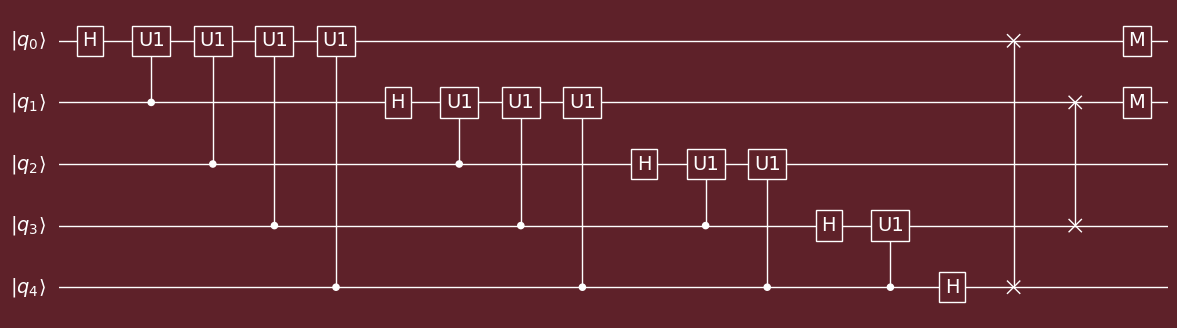

In [23]:
ax, fig = plot(c, scale = 0.8, cluster_gates = True, style="garnacha", save_file = "file2.png")

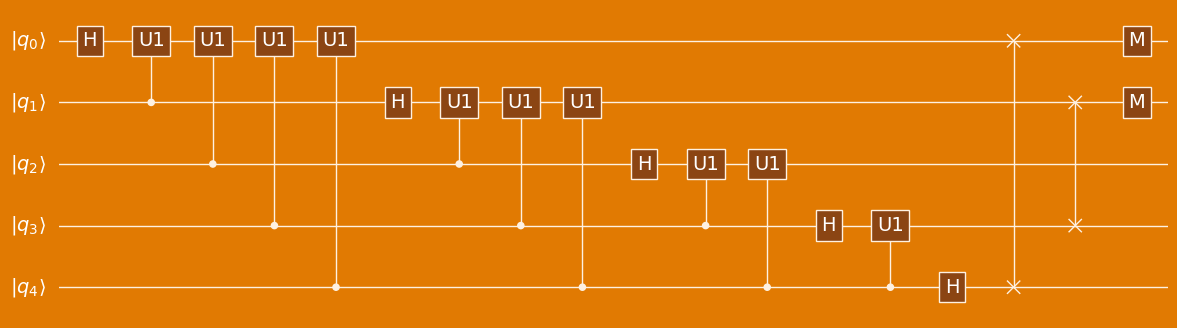

In [24]:
ax, fig = plot(c, scale = 0.8, cluster_gates = True, style="fardelejo")

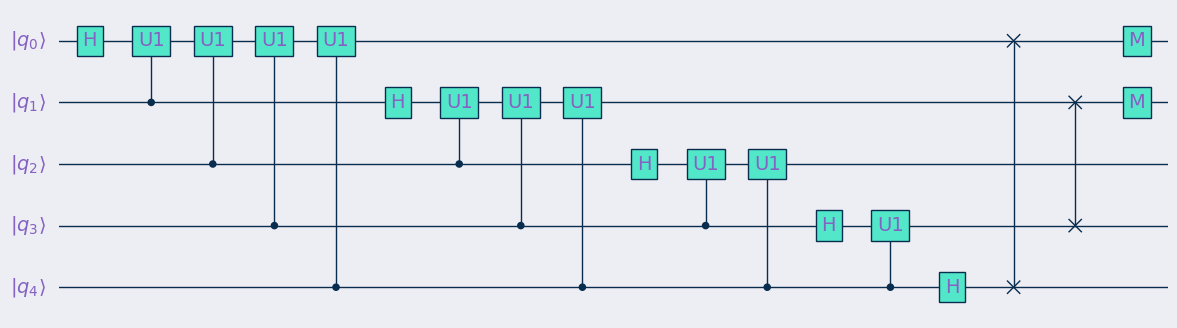

In [25]:
ax, fig = plot(c, scale = 0.8, cluster_gates = True, style="quantumspain")

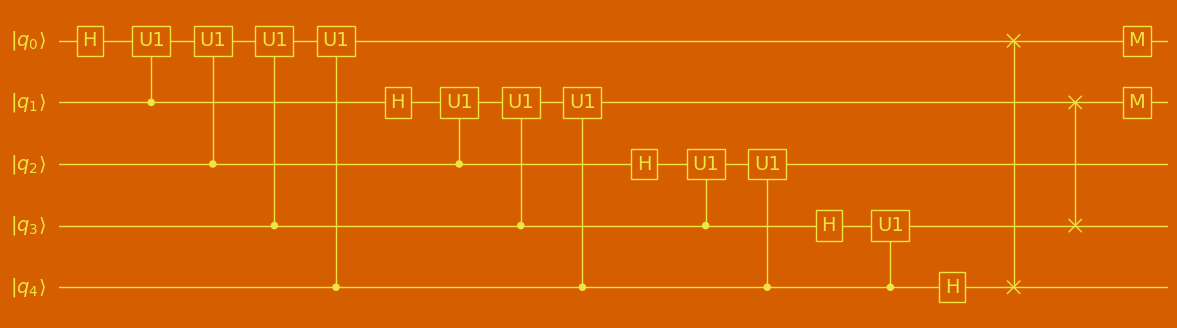

In [26]:
ax, fig = plot(c, scale = 0.8, cluster_gates = True, style="color-blind")

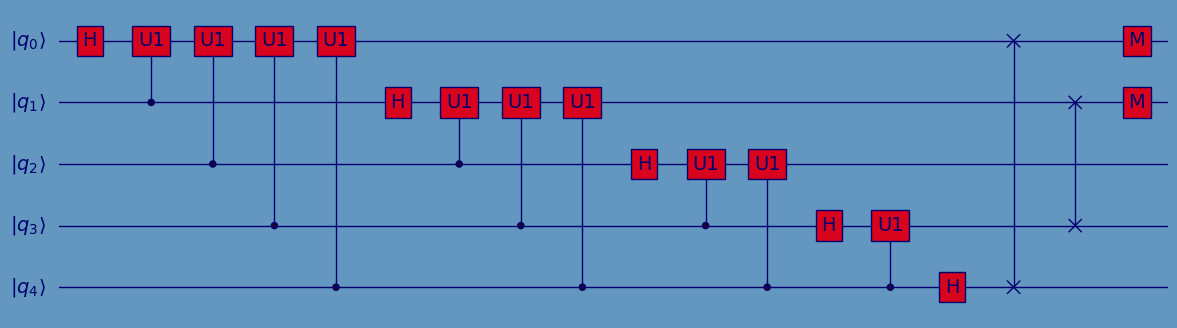

In [27]:
custom_style = dict()
custom_style["facecolor"]="#6497bf"
custom_style["edgecolor"]="#01016f"
custom_style["linecolor"]="#01016f"
custom_style["textcolor"]="#01016f"
custom_style["fillcolor"]="#ffb9b9"
custom_style["gatecolor"]="#d8031c"
custom_style["controlcolor"]="#360000"
ax, fig = plot(c, scale = 0.8, cluster_gates = True, style=custom_style)

In [14]:
c = models.Circuit(2)
c.add(gates.Unitary(np.random.random((4, 4)), 0, 1))
c.add(gates.Unitary(np.random.random((2, 2)), 0))
c.add(gates.Unitary(np.random.random((2, 2)), 1))

print(c.draw())

q0: ─U─U─
q1: ─U─U─


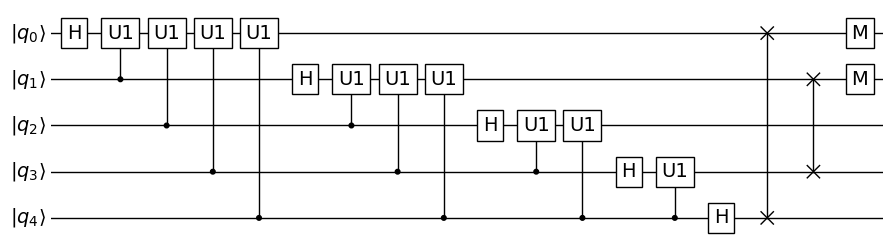

In [28]:
ax, fig = plot(c)

In [30]:
c = models.Circuit(6)

c.add(gates.Unitary(np.random.random((8, 8)), 0, 2, 3))
c.add(gates.Unitary(np.random.random((2, 2)), 2))
c.add(gates.Unitary(np.random.random((2, 2)), 4))

print(c.draw())

q0: ─U───
q1: ─|───
q2: ─U─U─
q3: ─U───
q4: ───U─
q5: ─────


(<Axes: >, <Figure size 120x360 with 1 Axes>)

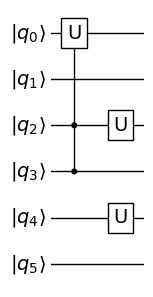

In [17]:
plot(c, cluster_gates = True)

In [18]:
c = models.Circuit(3)
c.add(gates.M(qubit) for qubit in range(2))
print(c.draw())

q0: ─M─
q1: ─M─
q2: ───


(<Axes: >, <Figure size 60x180 with 1 Axes>)

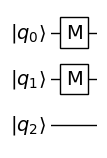

In [19]:
plot(c)

In [20]:
c = models.Circuit(3)
print(c.draw())

q0: ─
q1: ─
q2: ─


(<Axes: >, <Figure size 180x180 with 1 Axes>)

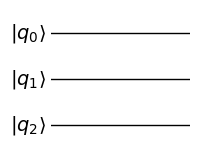

In [21]:
plot(c)